# Dynamic chaos in the kicked “photon-qubit atom"

## Plot mapping for system

In [113]:
import numpy as np
import math as mp
import matplotlib as mpl
import matplotlib.pyplot as plt
import imageio
import qutip
from tqdm import trange, notebook
from time import sleep
from odeintw import odeintw
from pylab import *
from matplotlib import cm


#  define system of motion equations 
def func(z,t):
    p, q, u, v = z
    return [-w**2 * q - ge * (np.conj(u) * v + u * np.conj(v)), p, 
            ((w2 / 2) * u + ge * q * v)/1j, (-(w2 / 2) * v + ge * q * u)/1j]


#  initial conditions
#-----------------------
w = 1                  #  photonic field frequency
w2 = w                 #  qubit frequency
r = 0.33                #  frequency ratio
Tk = 2 * np.pi *r / w  #  period of an external driving force 
T = Tk
Tq = 2 * Tk           # pulse repetition period

ge = 0.0002              #  coupling parameter
phi = 2.0               #  external driving force amplitude
q0 = 1                 #  initial coordinate
p0 = 1                 #  initial impulse
u0 = np.sqrt(2/4)   #  initial spinor component U
v0 = np.sqrt(2j/4)      #  initial spinor component V

n_steps = 1000        #  number of periods
print('Tk = ', Tk)
print('Tq = ', Tq)


Q = np.zeros(n_steps + 1, dtype=complex) 
P = np.zeros(n_steps + 1, dtype=complex)    
U = np.zeros(n_steps + 1, dtype=complex)   
V = np.zeros(n_steps + 1, dtype=complex)

P[0] = p0
Q[0] = q0
U[0] = u0
V[0] = v0

mxsteps = n_steps  #  step number in solving diff. equation

if n_steps <= 1000:
    mxsteps = 1000

#  mapping for (p, q, u, v)
for n in notebook.tqdm(range(1, n_steps + 1)):

    tn = Tq * (n - 1)

    p0 = P[n - 1]
    q0 = Q[n - 1]    
    u0 = (np.cos(phi) * U[n - 1] - 1j * np.sin(phi) * V[n - 1])*np.exp(- 1j * w2 * Tq / 2)
    v0 = (-1j * np.sin(phi) * U[n - 1] + np.cos(phi) * V[n - 1])*np.exp(1j * w2 * Tq / 2)
    
    z0 = [p0, q0, u0, v0]

    sol = odeintw(func, z0, [tn ,tn + Tq], atol=1e-12, rtol=1e-10, mxstep=mxsteps)
    #print(sol)
    P[n] = sol[-1,0]
    Q[n] = sol[-1,1]
    U[n] = sol[-1,2]
    V[n] = sol[-1,3]
print(Q)

Tk =  2.0734511513692637
Tq =  4.1469023027385274



[ 1.        +0.j -1.38047202+0.j  0.47906678+0.j ... -1.33096782+0.j
  0.30846763+0.j  1.00023239+0.j]


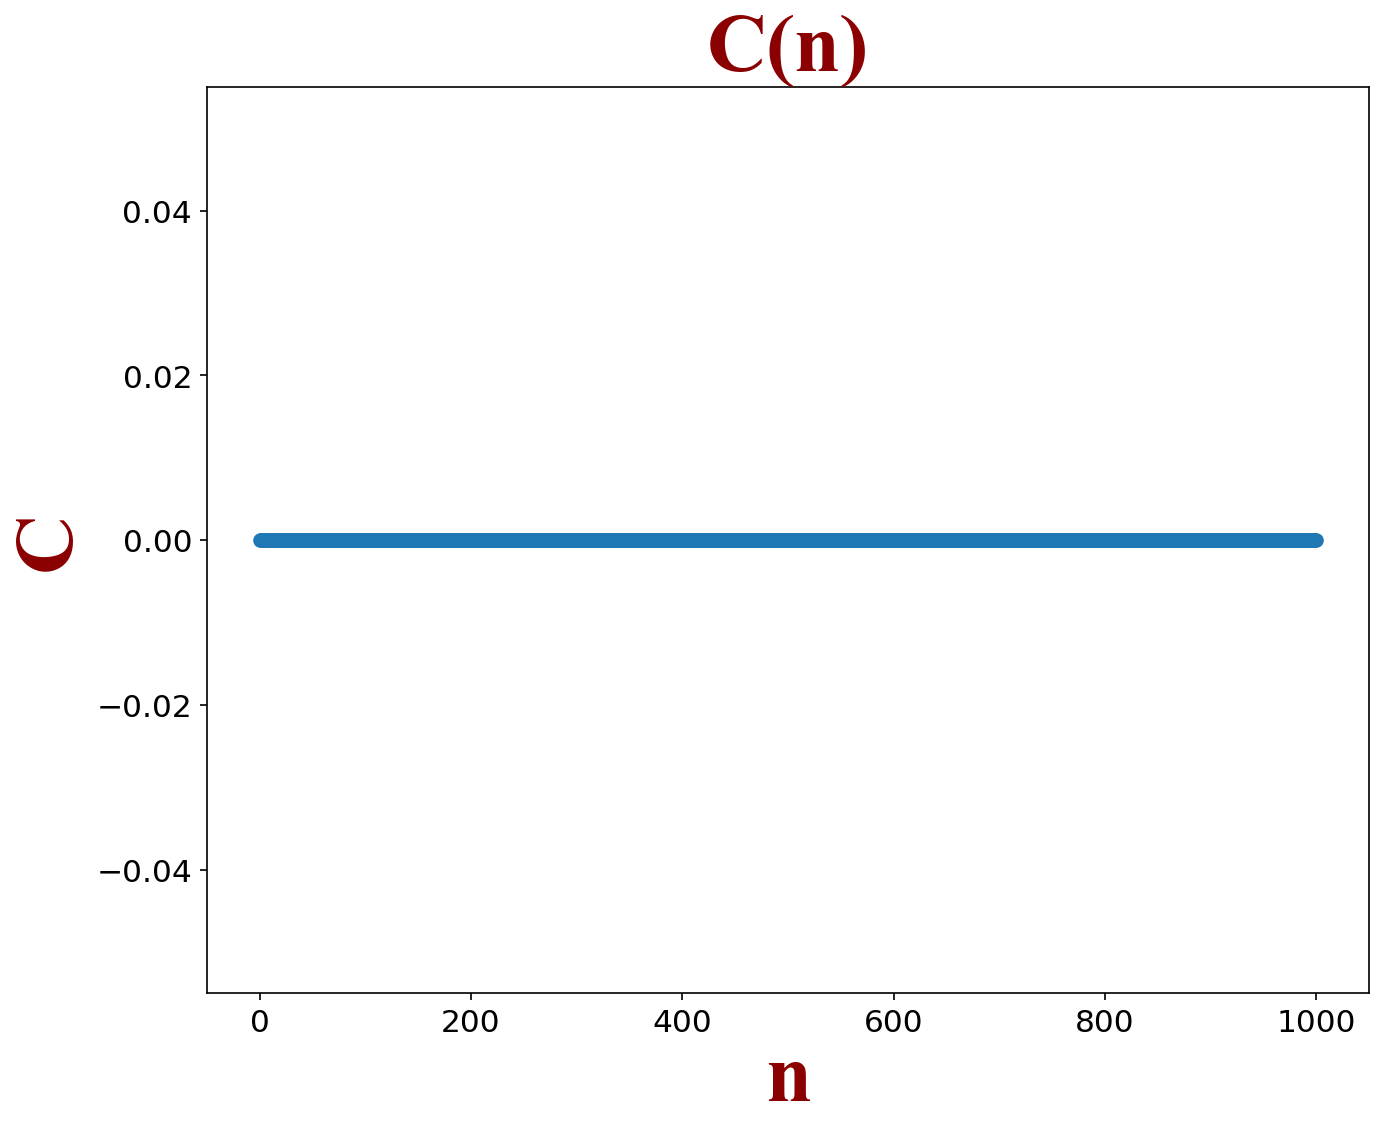

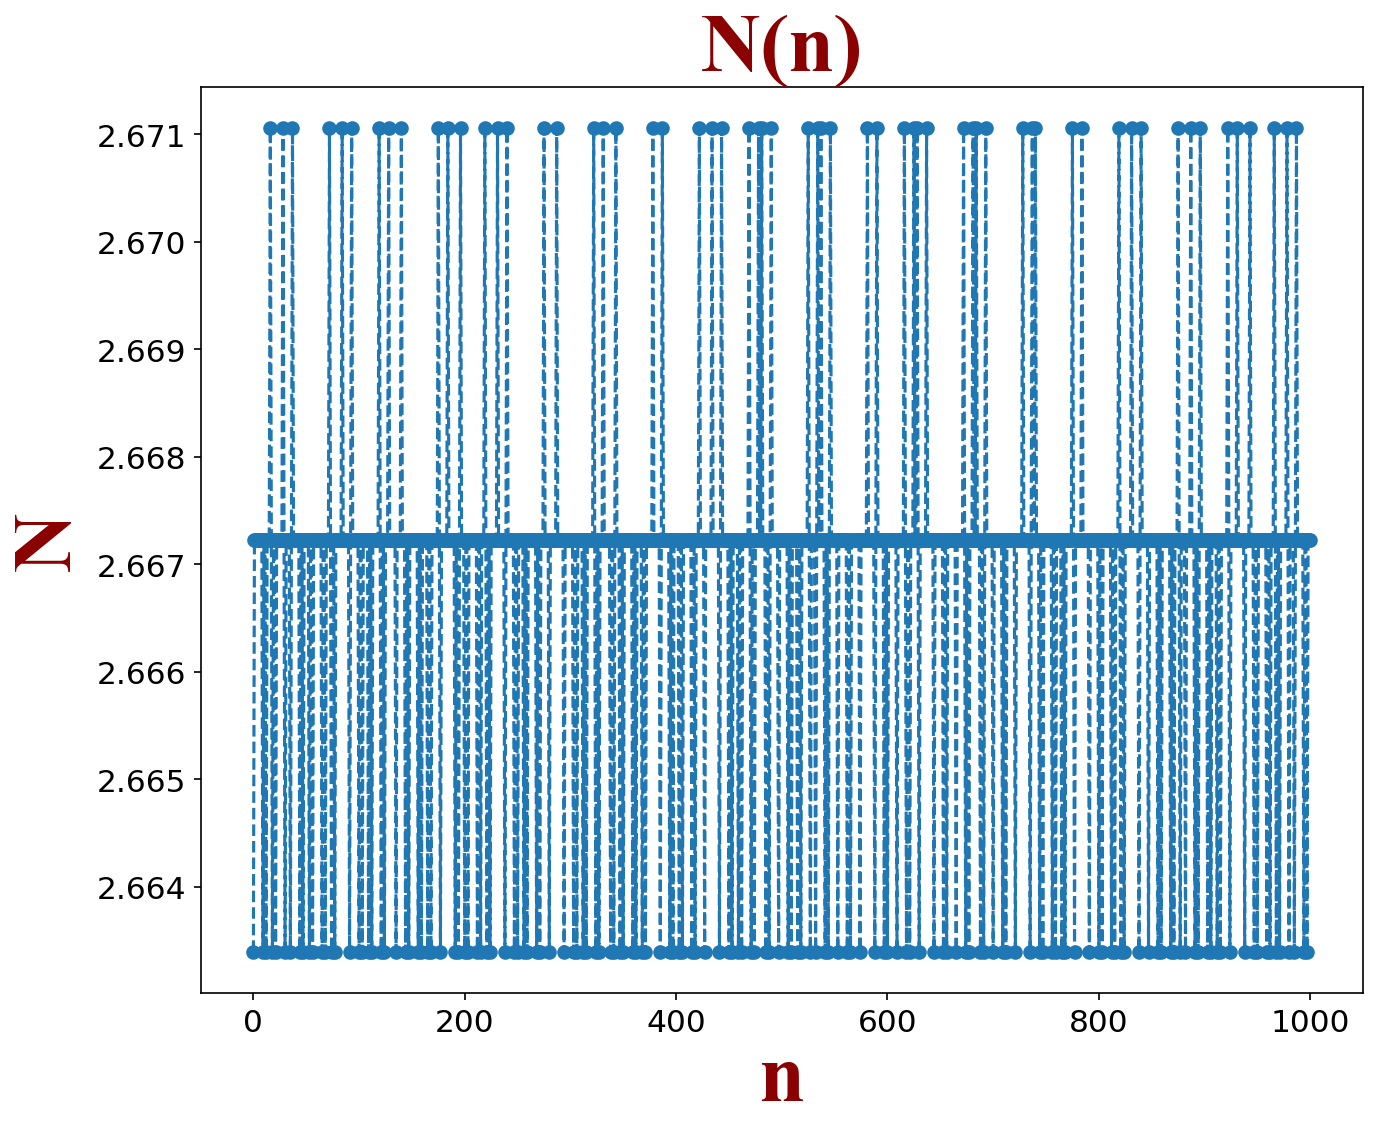

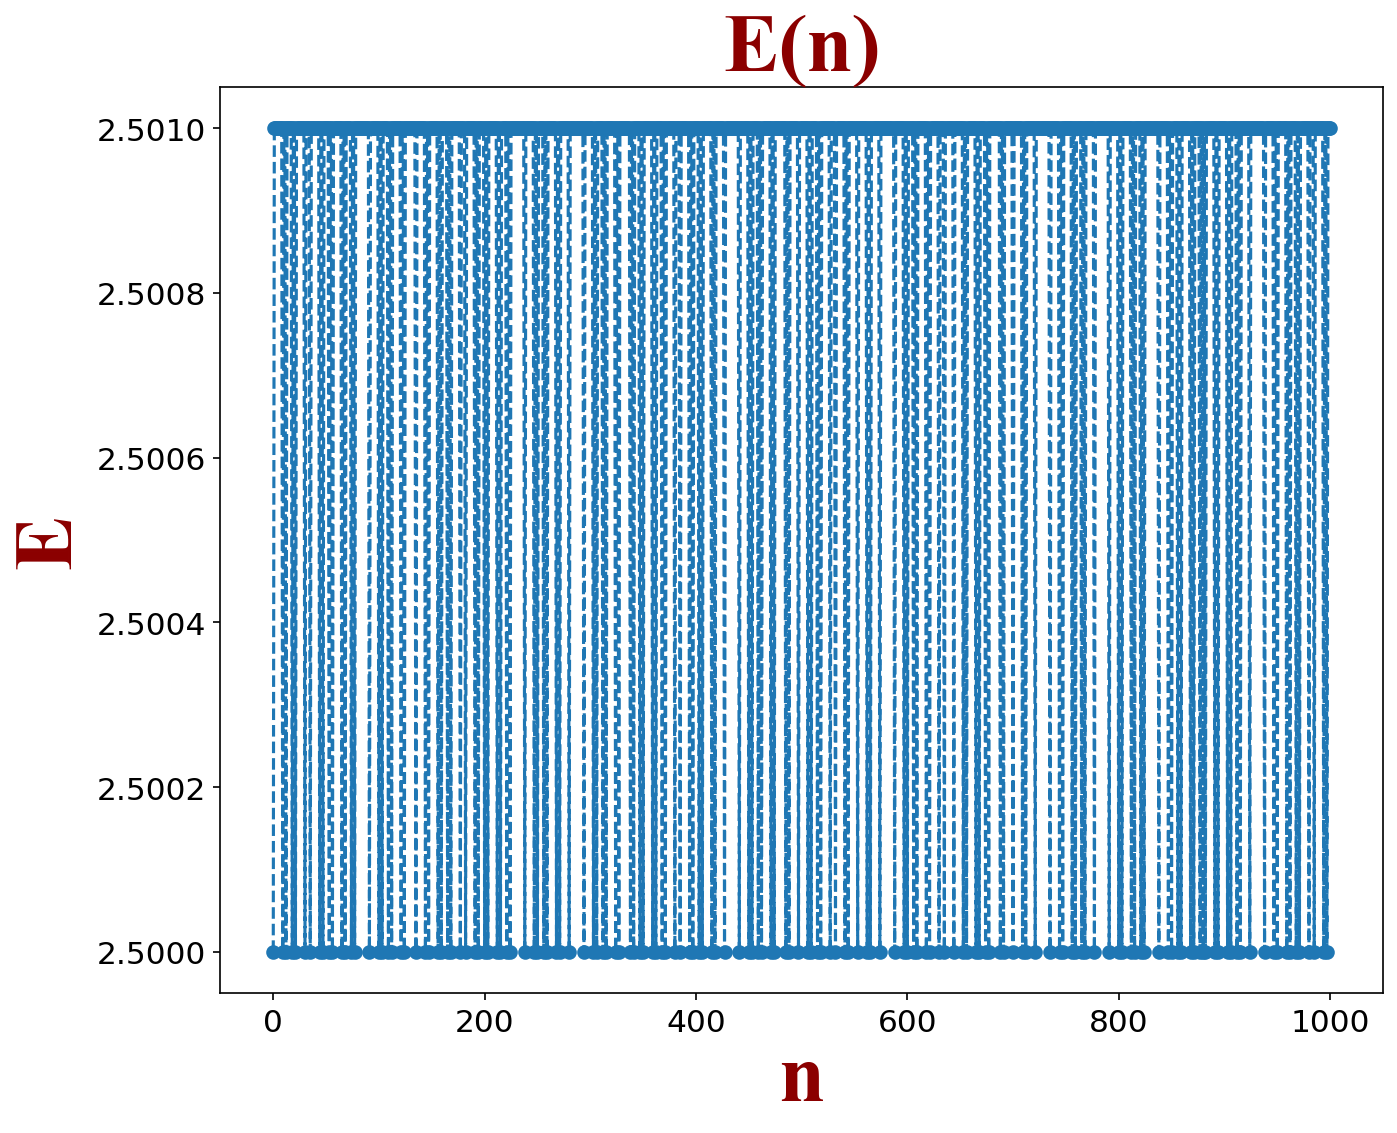

In [114]:
#  integrals of motion

font = {'family': 'times new roman',
        'color':  'darkred',
        'weight': 'bold',
        'size': 40,
        }

fontTitle = {'family': 'times new roman',
        'color':  'darkred',
        'weight': 'bold',
        'size': 40,
        }

sigma_x = [[0, 1], [1, 0]]
sigma_y = [[0, -1j], [1j, 0]]
sigma_z = [[1, 0], [0, -1]]
ident = np.identity(2, dtype=complex)

C = [np.sqrt(2 * w) * ge * np.dot(sigma_x, q) - np.sqrt(2 / w) * ge * np.dot(sigma_y, p) for q, p in zip(Q,P)]
N = [np.sqrt(w / 2) * np.dot(q**2, ident) + np.sqrt(1 / (2 * w)) * np.dot(p**2, ident) +
     np.dot(1/2, ident) + sigma_z for q, p in zip(Q,P)]
Ep = [(1/2) * w + (w / 2 * q**2 + p**2 / w / 2 + 1) * w 
      + ge * np.sqrt(w / 2 * q**2 + p**2 / w / 2 + 1) for q, p in zip(Q,P)]
Em = [(1/2) * w + (w / 2 * q**2 + p**2 / w / 2 + 1) * w 
      - ge * np.sqrt(w / 2 * q**2 + p**2 / w / 2 + 1) for q, p in zip(Q,P)]

C = np.round(C, 3)
N = np.round(N, 3)
Ep = np.round(Ep, 3)


fig = plt.figure(figsize=(10,8), dpi=150)
plt.plot(np.linalg.det(abs(np.asarray(C))), '--o')
plt.xlabel('n', fontdict=font)
plt.ylabel('C', fontdict=font)
plt.title('C(n)', fontdict=fontTitle)
plt.show()
fig.savefig('qubit_C,' + 'r=' + str(r) + ',f0=' + str(phi) + ',ge=' + str(ge) + '.png', dpi=fig.dpi)

fig = plt.figure(figsize=(10,8), dpi=150)
plt.plot(np.linalg.det(abs(np.asarray(N))), '--o')
plt.xlabel('n', fontdict=font)
plt.ylabel('N', fontdict=font)
plt.title('N(n)', fontdict=fontTitle)
plt.show()
fig.savefig('qubit_N,' + 'r=' + str(r) + ',f0=' + str(phi) + ',ge=' + str(ge) + '.png', dpi=fig.dpi)

fig = plt.figure(figsize=(10,8), dpi=150)
plt.plot(abs(np.asarray(Ep)), '--o')
plt.xlabel('n', fontdict=font)
plt.ylabel('E', fontdict=font)
plt.title('E(n)', fontdict=fontTitle)
plt.show()
fig.savefig('qubit_E,' + 'r=' + str(r) + ',f0=' + str(phi) + ',ge=' + str(ge) + '.png', dpi=fig.dpi)

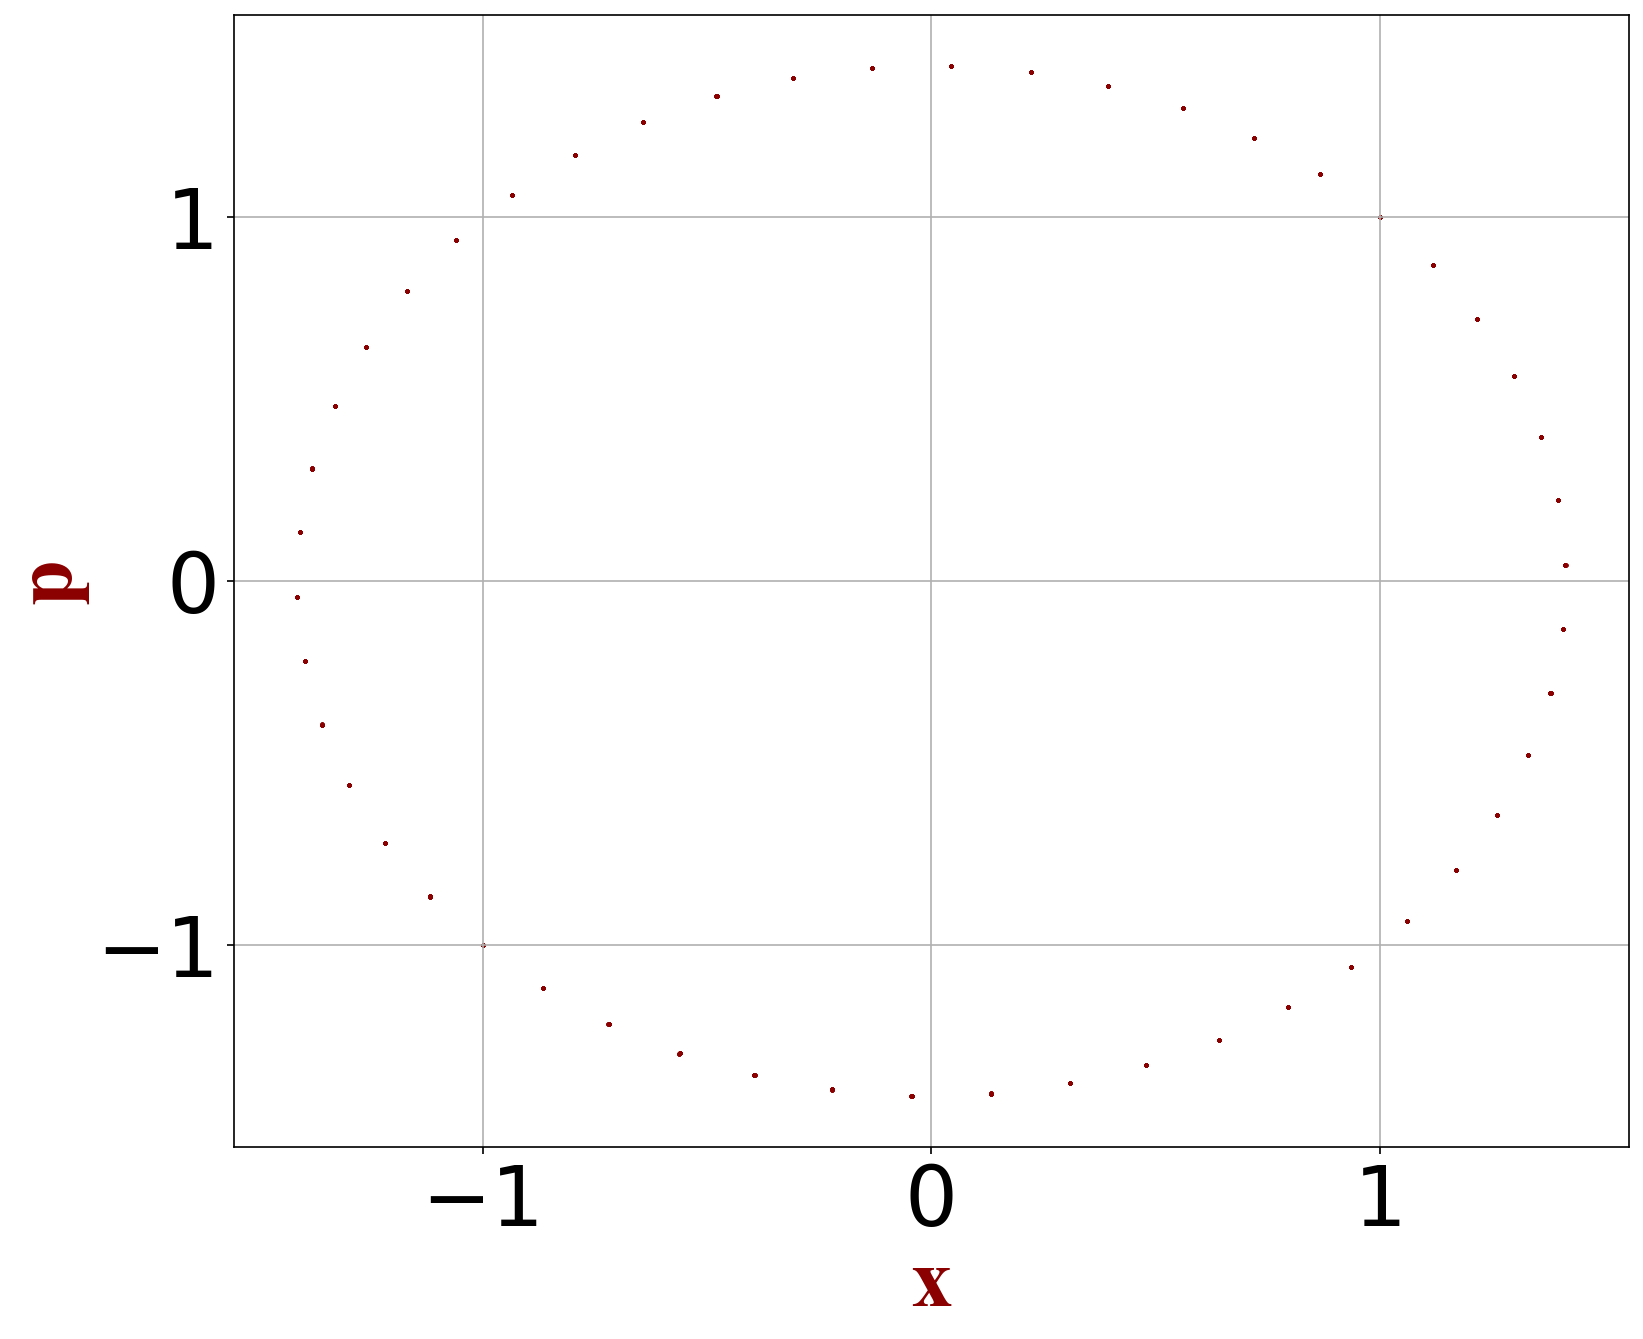

In [98]:
#  plot for (p, x)
fig = plt.figure(figsize=(12,10), dpi=150)

font = {'family': 'times new roman',
        'color':  'darkred',
        'weight': 'bold',
        'size': 40,
        }

fontTitle = {'family': 'times new roman',
        'color':  'darkred',
        'weight': 'bold',
        'size': 40,
        }

plt.xlabel('x', fontdict=font)
plt.ylabel('p', fontdict=font)

plt.scatter(Q.real,P.real, s=1, c='darkred')
plt.tick_params(labelsize=40)
plt.grid()
plt.show()
fig.savefig('qubit_px,' + 'r=' + str(r) + ',f0=' + str(phi) + ',ge=' + str(ge) + '.png', dpi=fig.dpi)

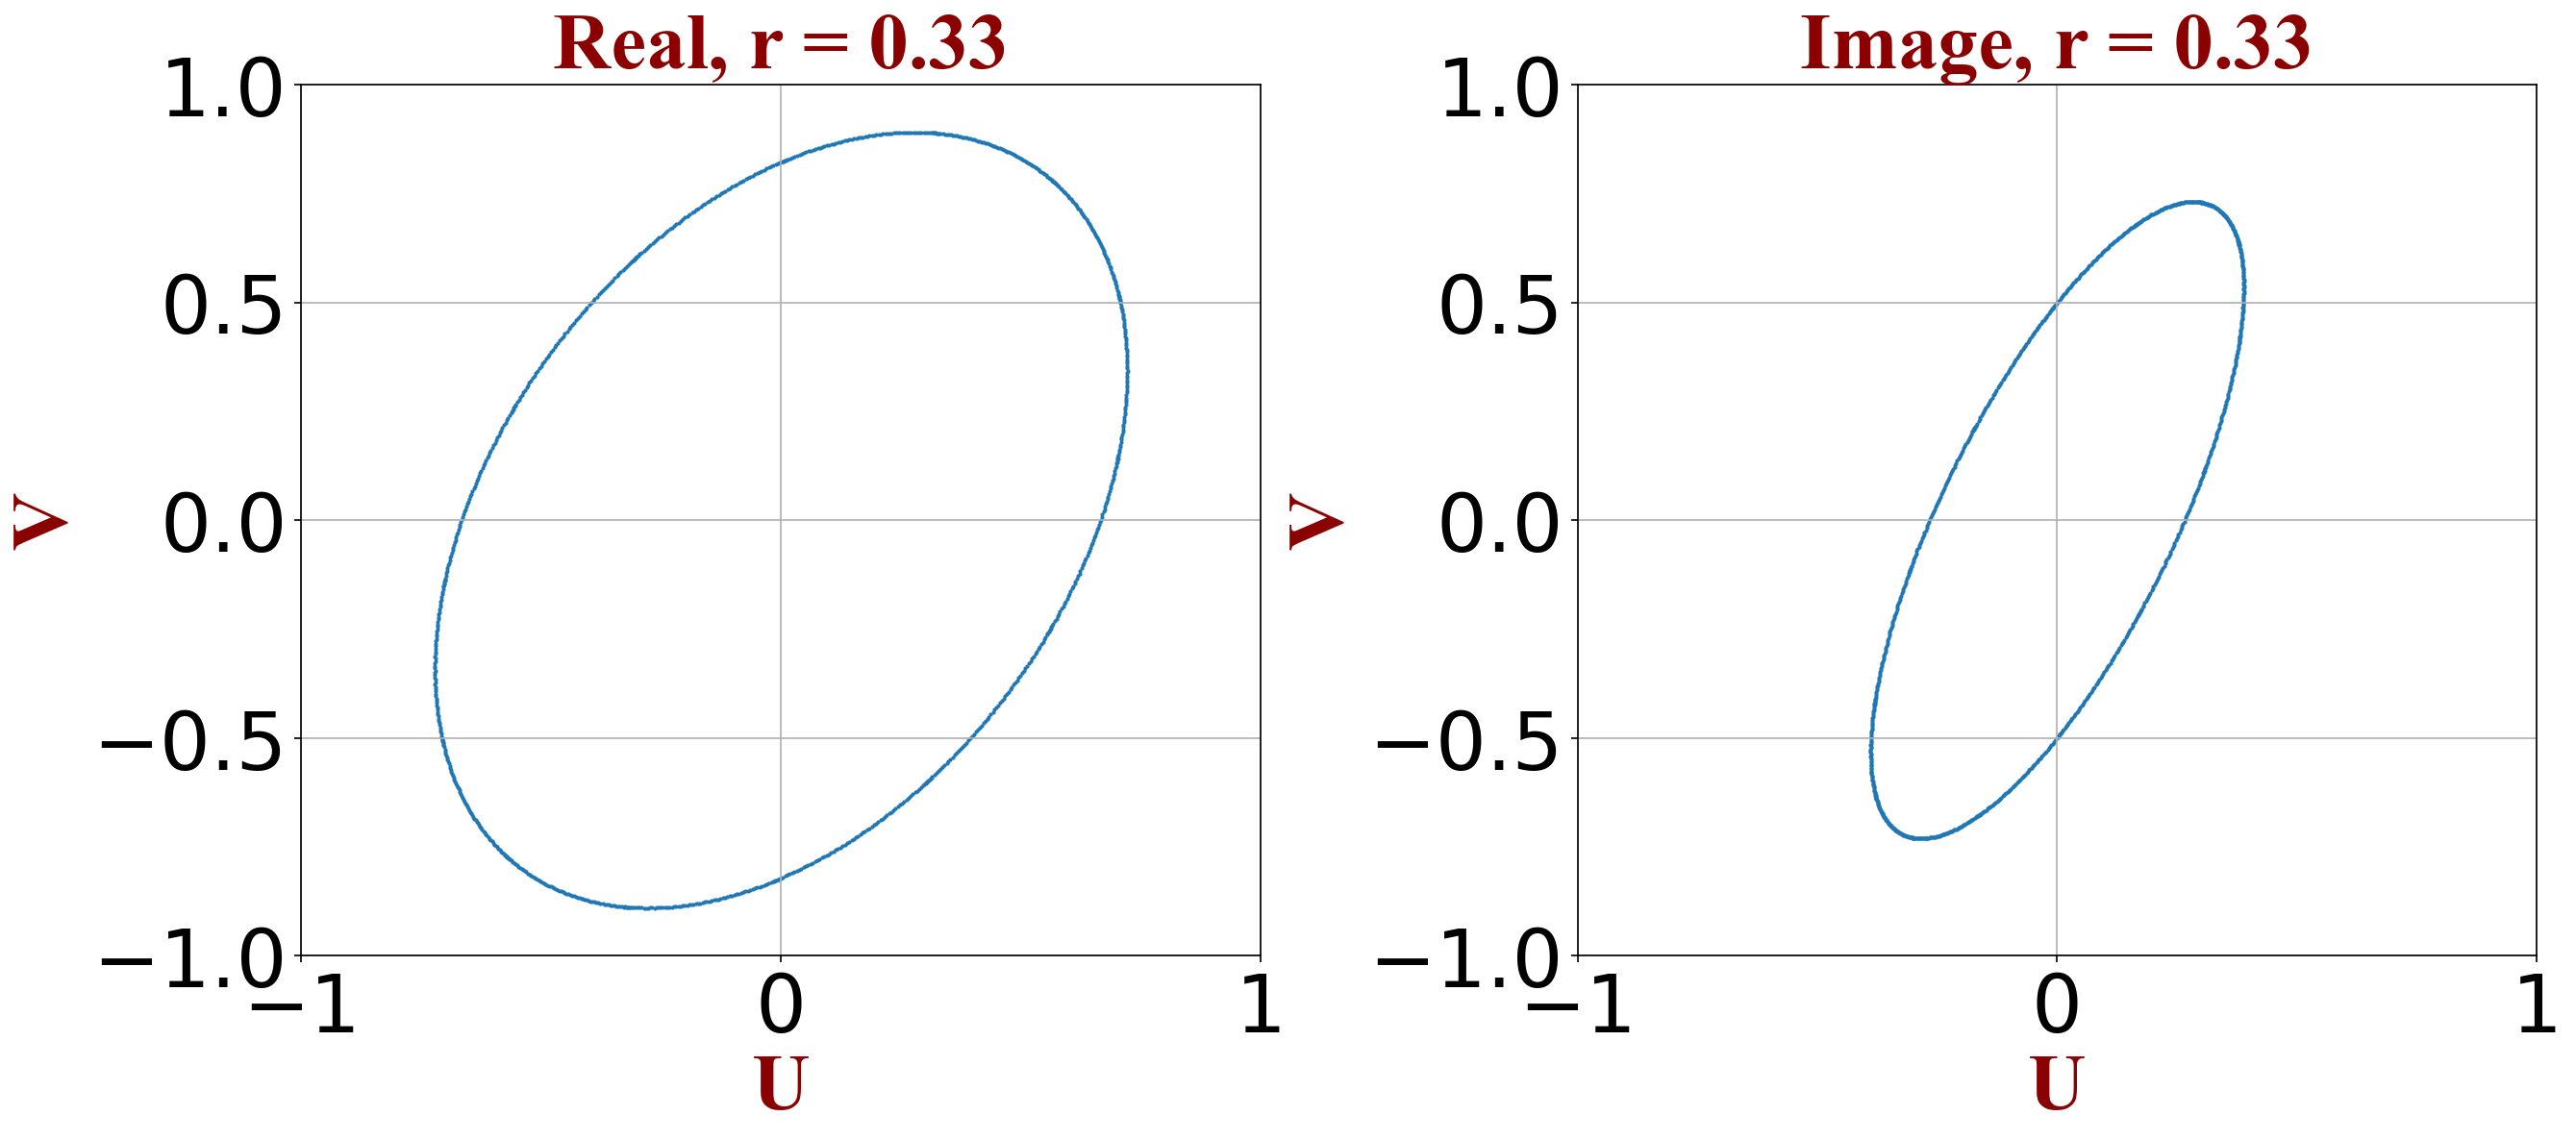

last norm:  1.0


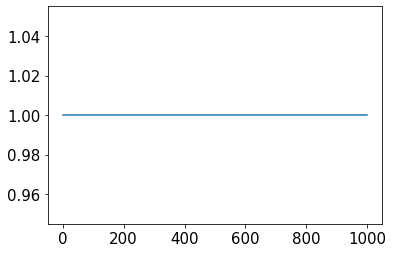

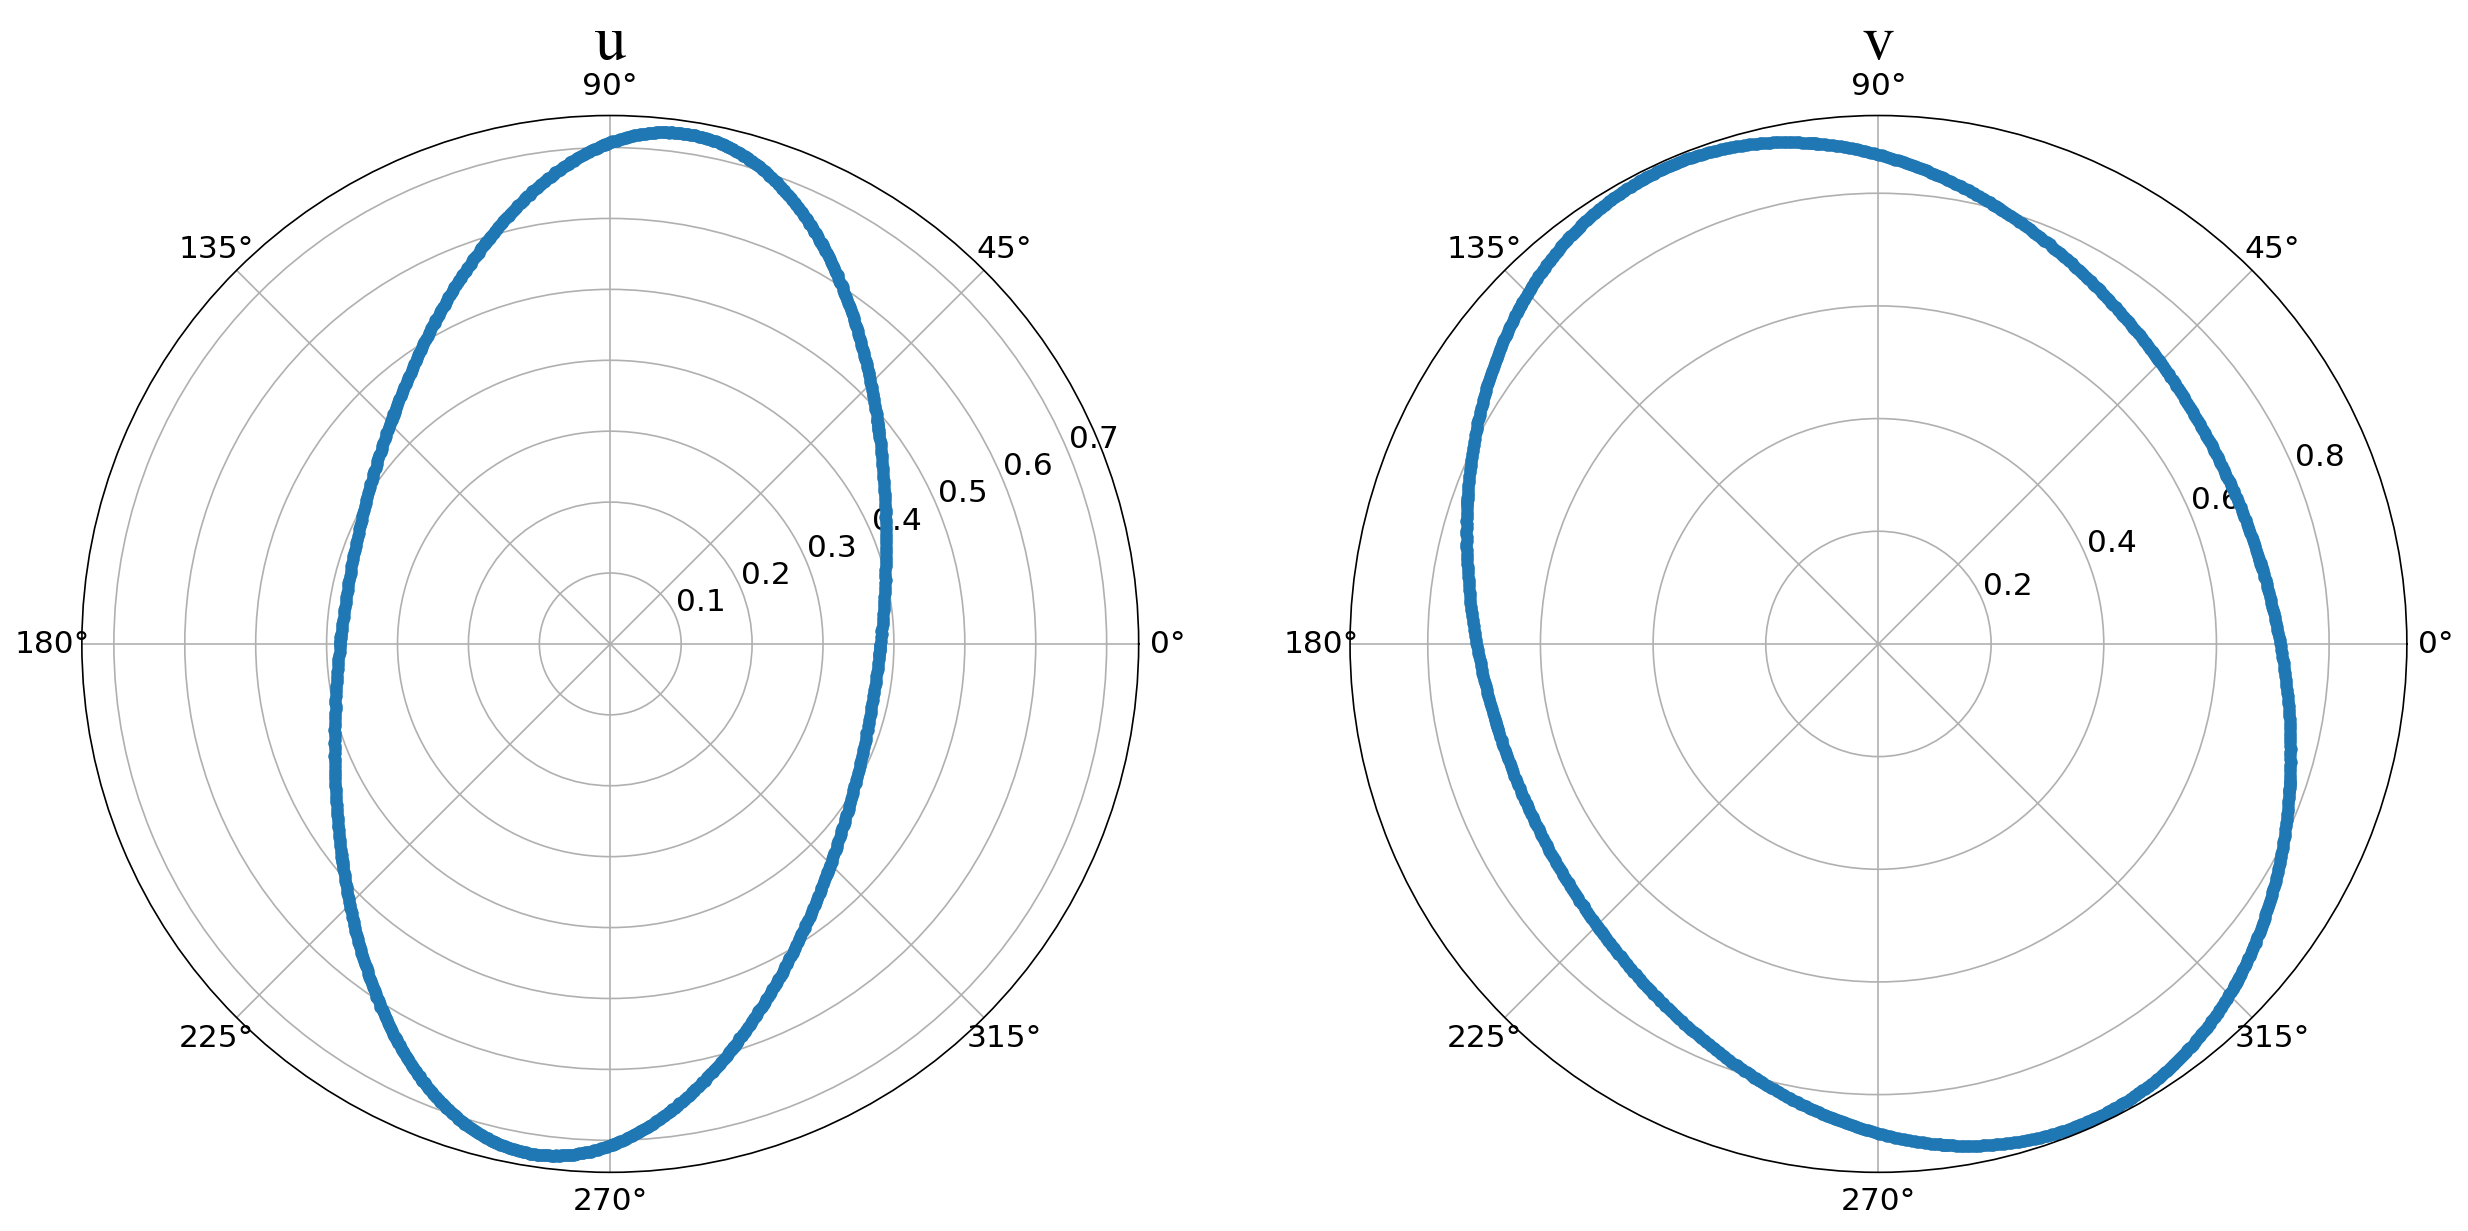

In [99]:
#  plot for (u, v)
fig = plt.figure(figsize=(20, 8), dpi=150)
fig.subplots_adjust(wspace=0.33)

font = {'family': 'times new roman',
        'color':  'darkred',
        'weight': 'bold',
        'size': 40,
        }

fontTitle = {'family': 'times new roman',
        'color':  'darkred',
        'weight': 'bold',
        'size': 40,
        }

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sc1 = ax1.scatter(U.real,V.real, s=1)
sc2 = ax2.scatter(U.imag,V.imag, s=1)

limit=np.max(np.ceil(np.absolute(U))) # set limits for axis
ax1.axis(xmin=-limit,xmax=limit, ymin=-limit, ymax=limit)
ax2.axis(xmin=-limit,xmax=limit, ymin=-limit, ymax=limit)

ax1.set_xlabel('U', fontdict=font)
ax1.set_ylabel('V', fontdict=font)
ax2.set_xlabel('U', fontdict=font)
ax2.set_ylabel('V', fontdict=font)

ax1.set_title('Real, r = ' + str(r), fontdict=fontTitle)
ax1.grid()
ax1.tick_params(labelsize=40)
ax2.set_title('Image, r = ' + str(r), fontdict=fontTitle)
ax2.tick_params(labelsize=40)
ax2.grid()

plt.show()

#  plot for (u, v)
fig1 = plt.figure(figsize=(10,8), dpi=150)
limit=np.max(np.ceil(np.absolute(U))) # set limits for axis
plt.axis(xmin=-limit,xmax=limit, ymin=-limit, ymax=limit)

plt.scatter(U.real,V.real, s=1)
plt.xlabel('U', fontdict=font)
plt.ylabel('V', fontdict=font)
plt.title('Real', fontdict=fontTitle)
plt.grid()
plt.tick_params(labelsize=40)
fig1.savefig('qubit_uv_re,' + 'r=' + str(r) + ',f0=' + str(phi) + ',ge=' + str(ge) + '.png', dpi=fig.dpi)
plt.close(fig1)

fig2 = plt.figure(figsize=(10,8), dpi=150)
limit=np.max(np.ceil(np.absolute(U))) # set limits for axis
plt.axis(xmin=-limit,xmax=limit, ymin=-limit, ymax=limit)
plt.scatter(U.imag,V.imag, s=1)
plt.xlabel('U', fontdict=font)
plt.ylabel('V', fontdict=font)
plt.title('Image', fontdict=fontTitle)
plt.tick_params(labelsize=40)
plt.grid()

fig2.savefig('qubit_uv_im,' + 'r=' + str(r) + ',f0=' + str(phi) + ',ge=' + str(ge) + '.png', dpi=fig.dpi)
plt.close(fig2)

#  norm of the spinor (u, v).T
ss = []
for i in range(len(U)):
    ss.append(np.sqrt(abs(U[i])**2 + abs(V[i])**2))
    
ss = np.round(ss, 4)
plt.plot(ss)

print('last norm: ', ss[-1])


#  polar plot for u(r, angle) and v(r, angle)
angleU = list(map(lambda x: mp.atan2(x.real, x.imag), U))
radU = abs(U)
angleV = list(map(lambda x: mp.atan2(x.real, x.imag), V))
radV = abs(V)

fig = plt.figure(figsize=(20, 10), dpi=150)
fig.subplots_adjust(wspace=0.2)
plt.rcParams.update({'font.size': 15})
ax1 = fig.add_subplot(121, polar=True)
ax2 = fig.add_subplot(122, polar=True)

sc1 = ax1.plot(angleU, radU, marker='o', markersize=5, linestyle = 'None')
sc2 = ax2.plot(angleV, radV, marker='o', markersize=5, linestyle = 'None')

ax1.set_title('u', fontname='Times New Roman', size=30)
ax2.set_title('v', fontname='Times New Roman', size=30)
plt.show()

fig = plt.figure(figsize=(10,8), dpi=300)
plt.polar(angleU, radU, marker='o', markersize=5, linestyle = 'None')
plt.title('u', fontdict=fontTitle)
plt.tick_params(labelsize=40, labelcolor='darkred')
plt.yticks([radU[-1]])
fig.savefig('qubit_polaru,' + 'r=' + str(r) + ',f0=' + str(phi) + ',ge=' + str(ge) + '.png', dpi=fig.dpi)
plt.close(fig)


fig = plt.figure(figsize=(10,8), dpi=300)
plt.polar(angleV, radV, marker='o', markersize=5, linestyle = 'None')
plt.title('v', fontdict=fontTitle)
plt.tick_params(labelsize=40, labelcolor='darkred')
plt.yticks([radV[-1], radU[0]])
fig.savefig('qubit_polarv,' + 'r=' + str(r) + ',f0=' + str(phi) + ',ge=' + str(ge) + '.png', dpi=fig.dpi)
plt.close(fig)

## Plot Bloch sphere for qubit

CPU times: user 5.19 s, sys: 140 ms, total: 5.33 s
Wall time: 5.03 s


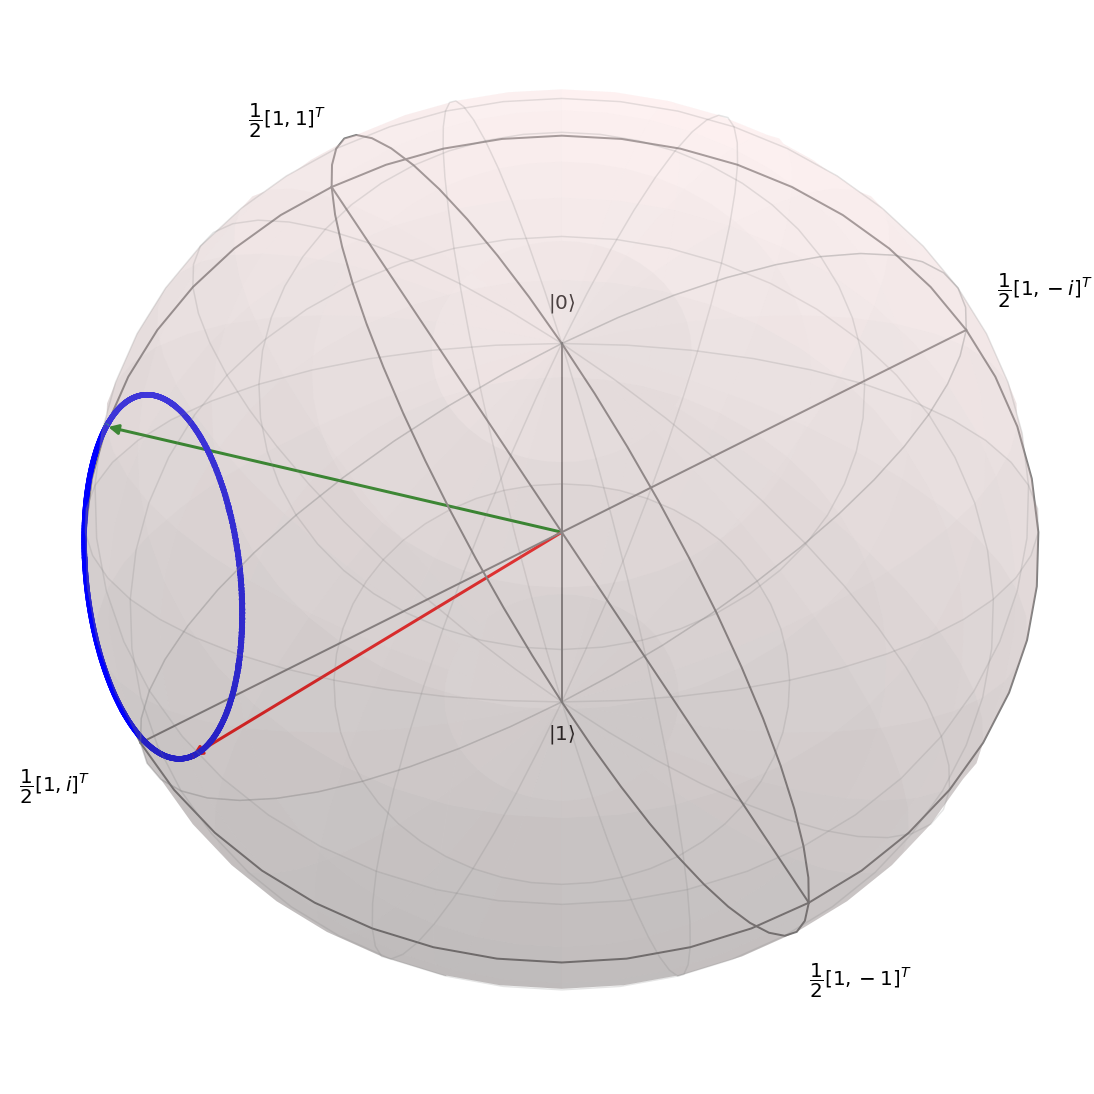

In [100]:
%%time
thett = np.array([complex(np.arcsin(2 * u * v)) for u, v in zip(U, V)])
phii = np.array([complex(-2j * np.log(u / np.cos(complex(np.arcsin(2 * u * v))/2))) for u, v in zip(U, V)])

#print(U[1])
#print(np.cos(thett[1]/2)*np.exp(1j * phii[1]/2))
#print(V[1])
#print(np.sin(thett[1]/2)*np.exp(-1j * phii[1]/2))

states = list(map(lambda theta, phi: qutip.Qobj([[np.cos(theta/2)*np.exp(1j * phi/2)],[np.sin(theta/2)*np.exp(-1j * phi/2)]]).unit(), 
             thett, phii))


#plt.plot([np.sqrt(sum(abs(np.asarray(states[i]))**2)) for i in range(len(states))], 'o', markersize=1)
#plt.show()

colors = ['blue' for i in range(len(states))]
colors[-1] = 'red'
colors[0] = 'lime'
#print(colors)

b = qutip.Bloch(figsize=(15,15))


## customize sphere properties ##
b.point_color = colors # options: 'r', 'g', 'b' etc.
b.vector_color = ['green', 'red']
b.point_marker = ['o']
b.point_size = [20]
b.xlabel = ['$ \dfrac{1}{2} [1, 1]^T $', '$ \dfrac{1}{2} [1, -1]^T $']
b.ylabel = ['$ \dfrac{1}{2} [1, i]^T $', '$ \dfrac{1}{2} [1, -i]^T $']
b.frame_width = 2

b.add_states([states[0], states[-1]])
b.add_states(states, 'point')

b.view = [60, 60]

b.render()

bb = b.fig
bb.savefig('qubitBloch,' + 'r=' + str(r) + ',f0=' + str(phi) + ',ge=' + str(ge) + '.png',dpi=150)

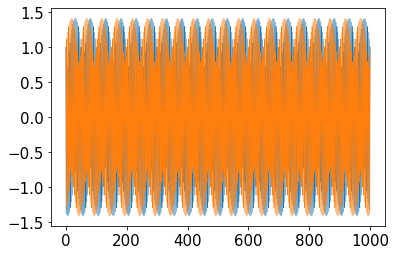

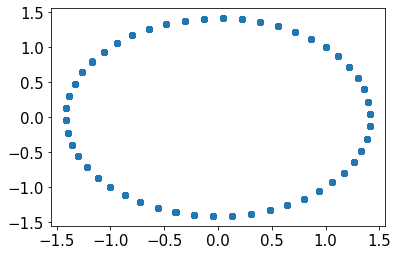

In [101]:
plt.plot(np.real(Q), linewidth=0.5)
plt.plot(np.real(P), linewidth=0.5)
plt.show()
plt.scatter(np.real(Q), np.real(P))

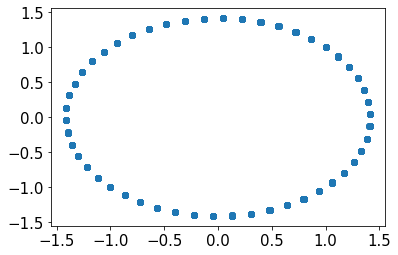

In [102]:
delta = 1e-7

Q1 = np.zeros(n_steps + 1, dtype=complex) 
P1 = np.zeros(n_steps + 1, dtype=complex)    
U1 = np.zeros(n_steps + 1, dtype=complex)   
V1 = np.zeros(n_steps + 1, dtype=complex)

P1[0] = p0
Q1[0] = q0 - delta
U1[0] = u0
V1[0] = v0

mxsteps = n_steps  #  step number in solving diff. equation

if n_steps <= 1000:
    mxsteps = 1000

#  mapping for (p, q, u, v)
for n in notebook.tqdm(range(1, n_steps + 1)):

    tn = Tq * (n - 1)

    p0 = P1[n - 1]
    q0 = Q1[n - 1]    
    u0 = (np.cos(phi) * U1[n - 1] - 1j * np.sin(phi) * V1[n - 1])*np.exp(- 1j * w2 * Tq / 2)
    v0 = (-1j * np.sin(phi) * U1[n - 1] + np.cos(phi) * V1[n - 1])*np.exp(1j * w2 * Tq / 2)
    
    z0 = [p0, q0, u0, v0]

    sol = odeintw(func, z0, [tn ,tn + Tq], atol=1e-12, rtol=1e-10, mxstep=mxsteps)
    #print(sol)
    P1[n] = sol[-1,0]
    Q1[n] = sol[-1,1]
    U1[n] = sol[-1,2]
    V1[n] = sol[-1,3]
#print(P)

plt.scatter(np.real(Q1), np.real(P1))

<Figure size 1500x1200 with 0 Axes>

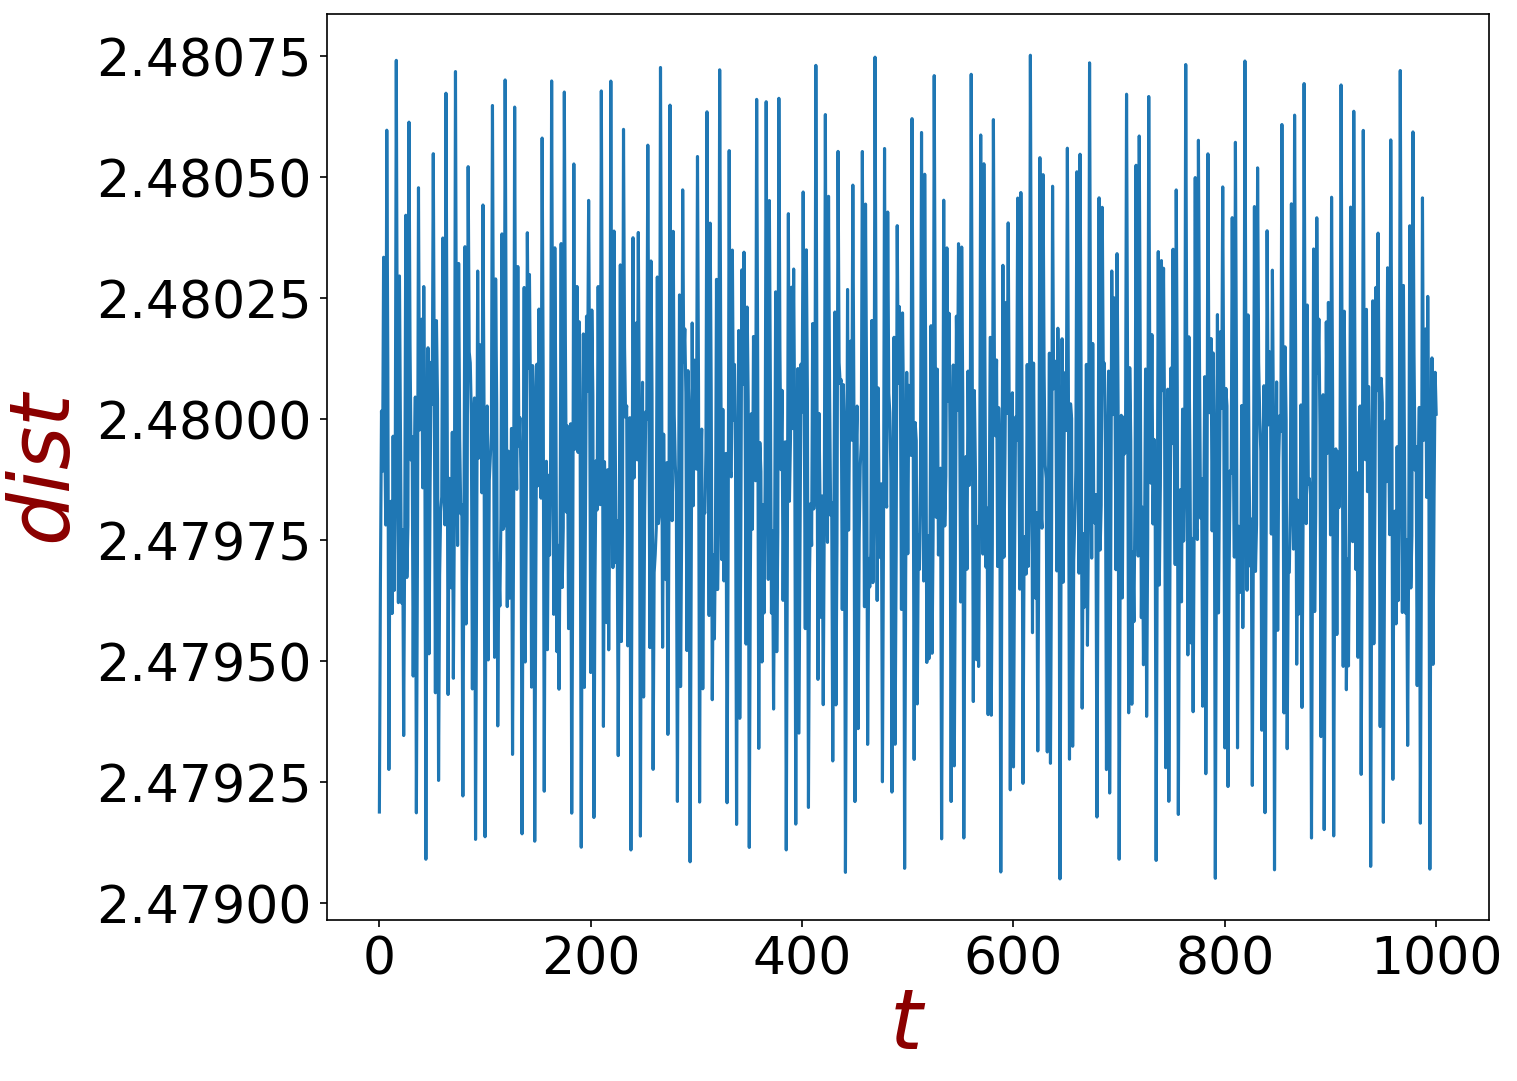

<Figure size 1500x1200 with 0 Axes>

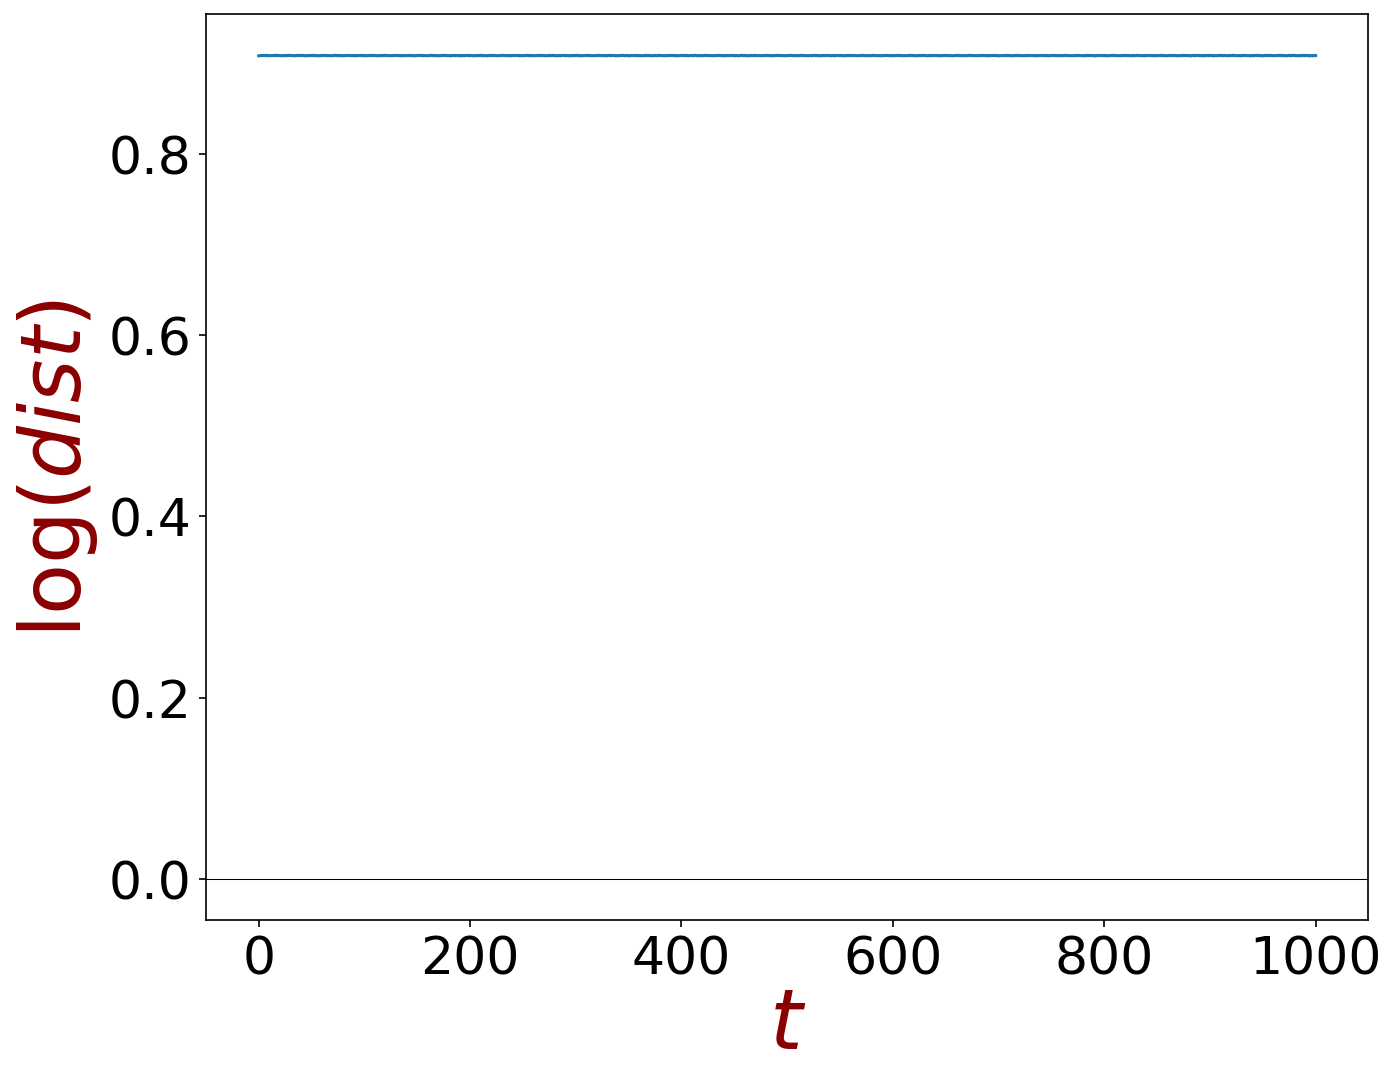

0.0009082626952949799


In [116]:
dx = [xtt - xttv for xtt, xttv in zip(np.real(Q), np.real(Q1))]
dp = [ptt - pttv for ptt, pttv in zip(np.real(P), np.real(P1))]

Dist = [np.sqrt(dx[i]**2 + dp[i]**2) for i in range(len(dx))]

LogDist = np.log(Dist)

plt.figure(figsize=(10,8), dpi=150)
plt.figure(figsize=(10,8), dpi=150)
plt.xlabel('$t$', fontdict=font)
plt.ylabel('$dist$', fontdict=font)
plt.tick_params(labelsize=25)
plt.plot(Dist)
plt.show()
plt.close()

plt.figure(figsize=(10,8), dpi=150)
plt.figure(figsize=(10,8), dpi=150)
plt.xlabel('$t$', fontdict=font)
plt.ylabel('$\log(dist)$', fontdict=font)
plt.tick_params(labelsize=25)
plt.plot(LogDist)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.show()
print(LogDist[-1]/n_steps)

<Figure size 1500x1200 with 0 Axes>

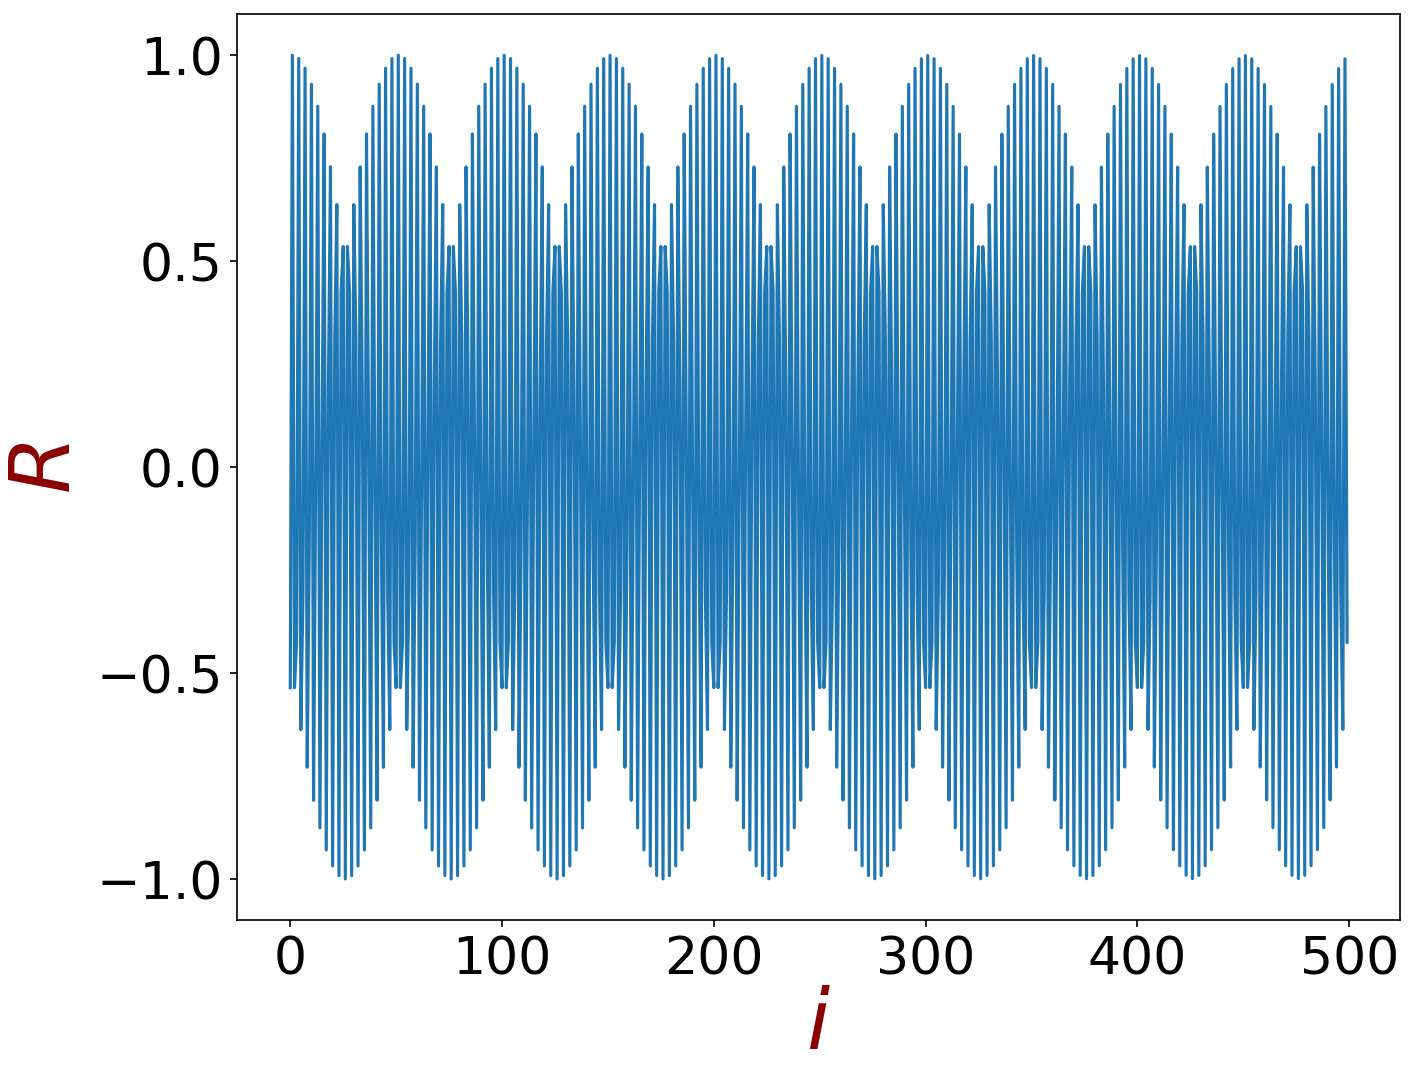

In [120]:
Mc = int(n_steps / 2.0)
sx = np.mean(np.real(Q))
Vx = np.var(np.real(Q))
Nsteps = n_steps

dxt = [np.real(Q)[i] - sx for i in range(len(Q))]

R = []

for i in range(Mc):
    
    summ = 0
    
    for j in range(i, Nsteps):
        
        summ += dxt[j]*dxt[j - i + 1]
    R.append(summ / ((Nsteps + 1 - i) * Vx))

    
plt.figure(figsize=(10,8), dpi=150)
plt.figure(figsize=(10,8), dpi=150)
plt.xlabel('$i$', fontdict=font)
plt.ylabel('$R$', fontdict=font)
plt.tick_params(labelsize=25)
plt.plot(R)
plt.show()

In [105]:
import nolds as nd

print('lyap for q = ', nd.lyap_e(Q.real))
print('lyap for p = ', nd.lyap_e(P.real))

lyap for q =  [-0.00023087 -0.00070676 -0.00400168 -0.007784  ]
lyap for p =  [-0.00018816 -0.00013437 -0.00360106 -0.00887753]


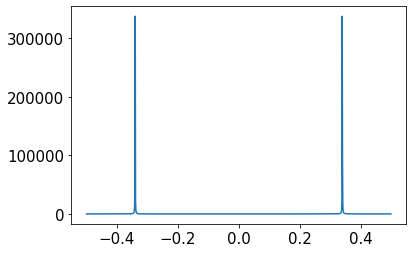

In [106]:
from __future__ import division

data = np.asarray(Q)
ps = np.abs(np.fft.fft(data))**2

time_step = 1 / 0.001
freqs = np.fft.fftfreq(data.size)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

/usr/local/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1024 is greater than input length  = 1001, using nperseg = 1001
  warnings.warn('nperseg = {0:d} is greater than input length '


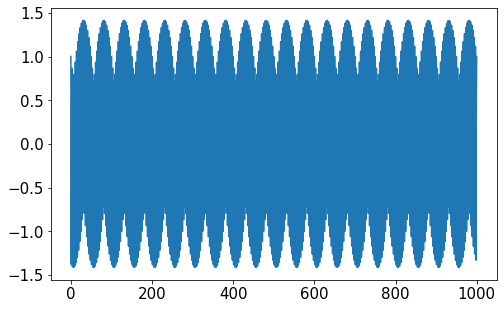

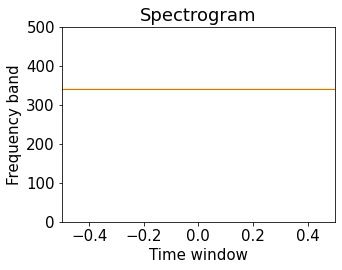

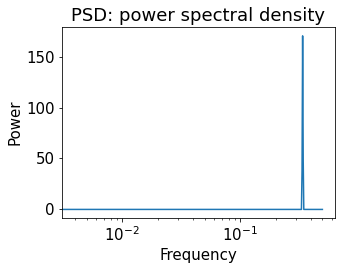

In [107]:
time_vec = np.arange(0, len(Q))
fs = 1e-5

# A signal
sig = Q.real

plt.figure(figsize=(8, 5))
plt.plot(time_vec, sig)

from scipy import signal
freqs, times, spectrogram = signal.spectrogram(sig, fs, nperseg=1024)

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

freqs, psd = signal.welch(sig)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

plt.show()

/usr/local/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1024 is greater than input length  = 1001, using nperseg = 1001
  warnings.warn('nperseg = {0:d} is greater than input length '


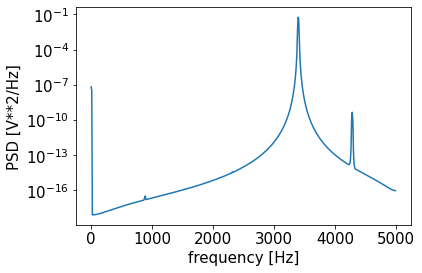

In [108]:
from scipy import signal
import matplotlib.pyplot as plt
np.random.seed(1234)


fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = Q.real


f, Pxx_den = signal.welch(x, fs, nperseg=1024)
plt.semilogy(f, Pxx_den)
#plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

/usr/local/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 1024 is greater than input length  = 1001, using nperseg = 1001
  warnings.warn('nperseg = {0:d} is greater than input length '


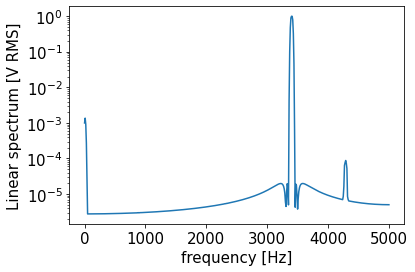

1.0004343420343784

In [109]:
f, Pxx_spec = signal.welch(x, fs, 'flattop', 1024, scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()

np.sqrt(Pxx_spec.max())

/usr/local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


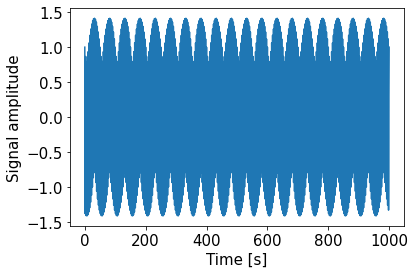

In [110]:
f = 10  # Frequency, in cycles per second, or Hertz
f_s = 10  # Sampling rate, or number of measurements per second

t = np.arange(0, Nsteps + 1)
x = Q

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

Text(0, 0.5, 'Frequency Domain (Spectrum) Magnitude')

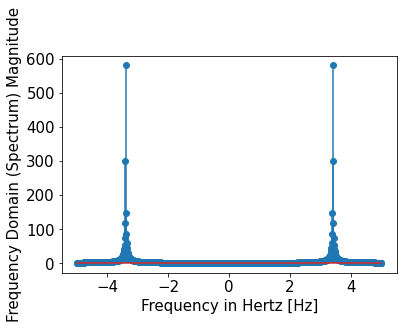

In [112]:
from scipy import fftpack

X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
#ax.set_xlim(-f_s / 2, f_s / 2)
#ax.set_ylim(-5, 310)

### Rest and Tests

In [ ]:
b = qutip.Bloch3d()

## customize sphere properties ##
b.point_color = colors # options: 'r', 'g', 'b' etc.
b.vector_color = ['red', 'green']
b.point_marker = ['o']
b.point_size = 0.04
b.size = [600,600]
#b.xlabel = ['$ \dfrac{1}{2} [1, 1]^T $', '$ \dfrac{1}{2} [1, -1]^T $']
#b.ylabel = ['$ \dfrac{1}{2} [1, i]^T $', '$ \dfrac{1}{2} [1, -i]^T $']
#b.frame_width = 2

b.view = [240, -420]
b.add_states(states, 'point')
b.add_states([states[0], states[-1]], 'vector')

b.show()

In [ ]:
%%time
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image, HTML

#%matplotlib notebook 

fig = plt.figure(figsize=(15,15), dpi=100)
ax = Axes3D(fig, azim=60,elev=60)
sphere = qutip.Bloch(fig, ax)

def animate(i):
    sphere.clear()
    sphere.add_states(states[0], 'vector')
    sphere.add_states(states[i])
    sphere.add_states(states[:i+1], 'point')
    sphere.frame_width = 2
    sphere.vector_width = 2
    
    
    sphere.make_sphere()
    fig.set_rasterized(True)
    return ax

def init():
    sphere.vector_color = ['r']
    sphere.xlabel = ['$ \dfrac{1}{2} [1, 1]^T $', '$ \dfrac{1}{2} [1, -1]^T $']
    sphere.ylabel = ['$ \dfrac{1}{2} [1, i]^T $', '$ \dfrac{1}{2} [1, -i]^T $']
    sphere.point_marker = ['o']
    sphere.point_color = colors
    sphere.point_size = [25]
    sphere.vector_color = ['red']
    return ax

ani = animation.FuncAnimation(fig, animate, np.arange(len(states)), init_func=init, repeat=False, 
                              blit=False)
plt.close()

ani.save('qubit_bloch_sphere.gif', fps=10)
Image(url='qubit_bloch_sphere.gif')

#HTML(ani.to_jshtml())

In [ ]:
vec = []
for i in range(len(U)):
    vec.append([np.dot(np.dot(transpose([np.conj(U[i]), np.conj(V[i])]), sigma_x), [U[i], V[i]]),
                np.dot(np.dot(transpose([np.conj(U[i]), np.conj(V[i])]), sigma_y), [U[i], V[i]]),
                np.dot(np.dot(transpose([np.conj(U[i]), np.conj(V[i])]), sigma_z), [U[i], V[i]])])
vec = real(np.asarray(vec))

b = qutip.Bloch(figsize=(15,15))


## customize sphere properties ##
b.point_color = colors # options: 'r', 'g', 'b' etc.
b.vector_color = ['green', 'red']
b.point_marker = ['o']
b.point_size = [20]
b.xlabel = ['$ \dfrac{1}{2} [1, 1]^T $', '$ \dfrac{1}{2} [1, -1]^T $']
b.ylabel = ['$ \dfrac{1}{2} [1, i]^T $', '$ \dfrac{1}{2} [1, -i]^T $']
b.frame_width = 2

b.add_vectors(vec)

b.view = [60, 60]

b.render()

In [ ]:
import numpy as np

#  initial conditions
#-----------------------
w = 1                  #  photonic field frequency
w2 = w                 #  qubit frequency
r = 0.33                #  frequency ratio
Tk = 2 * np.pi *r / w  #  period of an external driving force 
T = Tk
Tq = 2 * Tk           # pulse repetition period

ge = 1.0              #  coupling parameter
phi = 1.0               #  external driving force amplitude
q0 = 1                 #  initial coordinate
p0 = 1                 #  initial impulse
u0 = np.sqrt(2/4)   #  initial spinor component U
v0 = np.sqrt(2/4)      #  initial spinor component V

n_steps = 2000        #  number of periods
print('Tk = ', Tk)
print('Tq = ', Tq)


Q = np.zeros(n_steps + 1, dtype=complex) 
P = np.zeros(n_steps + 1, dtype=complex)    
U = np.zeros(n_steps + 1, dtype=complex)   
V = np.zeros(n_steps + 1, dtype=complex)

P[0] = p0
Q[0] = q0
U[0] = u0
V[0] = v0

mxsteps = n_steps  #  step number in solving diff. equation

if n_steps <= 1000:
    mxsteps = 1000



#  define system of motion equations 
def func(z,t):
    p, q, u, v = z
    return [-w**2 * q - ge * (np.conj(u) * v + u * np.conj(v)), p, 
            ((w2 / 2) * u + ge * q * v)/1j, (-(w2 / 2) * v + ge * q * u)/1j]

#Jacobian matrix
def JM(z):
    p, q, u, v = [i for i in z]
    return np.array([[-w**2, 0, -ge*np.conj(v), -ge*np.conj(u)], [0, 1, 0, 0], 
                     [-ge*v, 0, -1j*w2/2, -1j*ge*q], [-1j*ge*u, 0, -1j*ge*q, 1j*w2/2]])

U1 = np.eye(4) #unit blob
I3 = np.ones(4)
lyap = [] #empty list to store the lengths of the orthogonal axes

sols = []
vn =[]

for n in notebook.tqdm(range(1, n_steps + 1)):

    tn = Tq * (n - 1)

    p0 = P[n - 1]
    q0 = Q[n - 1]    
    u0 = (np.cos(phi) * U[n - 1] - 1j * np.sin(phi) * V[n - 1])*np.exp(- 1j * w2 * Tq / 2)
    v0 = (-1j * np.sin(phi) * U[n - 1] + np.cos(phi) * V[n - 1])*np.exp(1j * w2 * Tq / 2)
    
    z0 = [p0, q0, u0, v0]

    sol = odeintw(func, z0, [tn ,tn + Tq], atol=1e-12, rtol=1e-10, mxstep=mxsteps)
    #v_n = sol.T #transpose the solution
    #vn.append(v_n)
    
    #print(sol)
    P[n] = sol[-1,0]
    Q[n] = sol[-1,1]
    U[n] = sol[-1,2]
    V[n] = sol[-1,3]
    sols.append(sol)
#print(Q)

#do this for each iteration
for k in range(0, n_steps):
    v0 = [P[k], Q[k], U[k], V[k]] #new v0 after iteration
    U_n = np.matmul(I3+dt*JM(v0), U1)

    #do a Gram-Schmidt Orthogonalisation (GSO)
    q, R = np.linalg.qr(U_n)
    lyap.append(np.log(abs(R.diagonal())))

    U1 = q #new axes after iteration
    
dt=0.001
    
[sum([lyap[k][j] for k in range(n_steps)]) / (dt * n_steps) for j in range(4)]
plt.plot(lyap)
print(lyap[-1])